# Echoregions Regions2D Plotting Demonstration

In [1]:
import sys
sys.path.append('..')
import echoregions as er

In [2]:
evr_file = '../echoregions/test_data/ek60/x1.evr'
echo_files = 'F:/data/hake/raw/SH1707/'

### Get a Regions2D object with `read_evr`

In [3]:
r2d = er.read_evr(evr_file)

## Plotting

In [4]:
import matplotlib.pyplot as plt
import xarray as xr
import os
import echopype as ep
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
# Display availible regions
print(r2d.data.region_id.values)

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35]
Length: 33, dtype: Int64


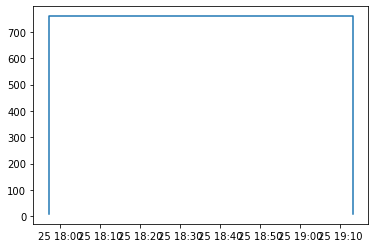

In [6]:
# Plot the region with `plot`
r2d.plot(10)

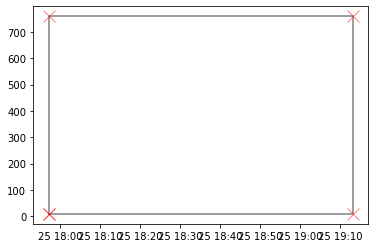

In [7]:
# Plot a closed region by using close_region=True.
# Optionally provide matplotlib kwargs for more customization.
r2d.plot(10, close_region=True, color='k', alpha=.5, marker='x', markeredgecolor='red', markersize=12)

## Plotting regions on an echogram

In [8]:
# Get all of the raw files availible
raw_files = os.listdir(echo_files)
raw_files

['Summer2017-D20170625-T124834.nc',
 'Summer2017-D20170625-T132103.nc',
 'Summer2017-D20170625-T134400.nc',
 'Summer2017-D20170625-T140924.nc',
 'Summer2017-D20170625-T143450.nc',
 'Summer2017-D20170625-T150430.nc',
 'Summer2017-D20170625-T153818.nc',
 'Summer2017-D20170625-T161209.nc',
 'Summer2017-D20170625-T164600.nc',
 'Summer2017-D20170625-T171948.nc',
 'Summer2017-D20170625-T175136.nc',
 'Summer2017-D20170625-T181701.nc',
 'Summer2017-D20170625-T184227.nc',
 'Summer2017-D20170625-T190753.nc',
 'Summer2017-D20170625-T193400.nc',
 'Summer2017-D20170625-T195927.nc',
 'Summer2017-D20170625-T202452.nc',
 'Summer2017-D20170625-T205018.nc',
 'Summer2017-D20170625-T211542.nc',
 'Summer2017-D20170625-T214108.nc',
 'Summer2017-D20170625-T220634.nc',
 'Summer2017-D20170625-T223159.nc',
 'Summer2017-D20170625-T225724.nc',
 'Summer2017-D20170625-T232250.nc',
 'Summer2017-D20170625-T234816.nc']

In [9]:
# Select the file(s) that a region is contained in. Using region 11 in this case.
file = r2d.select_sonar_file(raw_files, 11)
file

'Summer2017-D20170625-T195927.nc'

In [ ]:
# Calibrate the file with echopype
ed = ep.open_converted(echo_files + file)
Sv = ep.calibrate.compute_Sv(ed)
Sv

In [ ]:
# The data from echopype currently uses range from the sensor and not depth below the water
# A temporary fix involves offseting the depth of the region with the water level
r2d.offset = -ed.platform.water_level[0, 0].values
r2d.adjust_offset(inplace=True);

In [ ]:
# Plot echogram for one frequency
Sv['range'] = Sv.range.isel(frequency=0, ping_time=0)
Sv = Sv.swap_dims({'range_bin': 'range'})

In [ ]:
Sv.Sv.isel(frequency=0).plot(x='ping_time', vmax=-40, vmin=-100, yincrease=False, figsize=(12,8))
# Plot region
r2d.plot(11, close_region=True, color='k')
plt.show()